<a href="https://colab.research.google.com/github/tracieschroeder/Astronomy/blob/main/Solar_Position_that_I_use_to_get_the_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solar position is a fundamental aspect of solar resource assessment. The different angles used in the reference system to locate the sun at a particular time and location are probably the most common input in solar resource modelling and assessment.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are going to want to draw data from a module called pvlib.

![link text](https://pvlib-python.readthedocs.io/en/stable/_images/pvlib_logo_horiz.png)

pvlib was developed at Sandia National Laboratories and it provides a set of functions and classes for simulating the performance of photovoltaic energy systems.

Since this is an outside data source, we will need to install this module before we can import data from it.


In [2]:
!pip install pvlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 21.2 MB/s eta 0:00:00


Now that we have installed the module, we can import it into our program.

In [3]:
import pvlib

There are two parts to the the pvlib module that we want to use in our program. solarposition supplies data about...wait for it...the position of the Sun. Location allows us to use a specific location for our data. Import these two objects.

In [4]:
from pvlib import solarposition
from pvlib.location import Location

Now that we have our background information all set up, we need to specify a location. You will probably need to look up the time zones. To enter them into the code correctly, use [pvlib's time zone documentation](https://pvlib-python.readthedocs.io/en/stable/timetimezones.html).

In [5]:
# Definition of Location object. Coordinates and elevation of Council Grove
site = Location(38.6629036,-96.510788, 'Etc/GMT-6', 0, 'Council Grove, Kansas') # latitude, longitude, time_zone, altitude, name

We are able to change the range of the date of the data we are looking at using the pd.date_range function.

In [7]:
# Definition of a time range of simulation
times = pd.date_range('2022-03-21 00:00:00', '2022-03-21 23:59:00', inclusive='left', freq='H', tz=site.tz)
times2 = pd.date_range('2022-06-21 00:00:00', '2022-06-21 23:59:00', inclusive='left', freq='H', tz=site.tz)
times3 = pd.date_range('2022-09-21 00:00:00', '2022-09-21 23:59:00', inclusive='left', freq='H', tz=site.tz)
times4 = pd.date_range('2022-12-21 00:00:00', '2022-12-21 23:59:00', inclusive='left', freq='H', tz=site.tz)

Let's print a data table with the information that is available to us in this module. Remember you can change the number of rows of data that are printed. For lack of a more creative idenitfier, let's call our data "data".

In [8]:
# Estimate Solar Position with the 'Location' object
data = site.get_solarposition(times)
data2 = site.get_solarposition(times2)
data3 = site.get_solarposition(times3)
data4 = site.get_solarposition(times4)

# Visualize the resulting DataFrame
data.head(5)

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2022-03-21 00:00:00+06:00,39.365330,39.379139,50.634670,50.620861,166.755971,-7.382987
2022-03-21 01:00:00+06:00,39.073345,39.087012,50.926655,50.912988,190.577113,-7.370613
2022-03-21 02:00:00+06:00,43.387495,43.403400,46.612505,46.596600,212.473594,-7.358235
2022-03-21 03:00:00+06:00,51.120856,51.141700,38.879144,38.858300,230.051382,-7.345854
2022-03-21 04:00:00+06:00,60.921411,60.951527,29.078589,29.048473,243.787078,-7.333470


We are interested in plotting the altitude and the azimuth over the course of certain days. We already identified the time range as March 21, 2022 a few lines above, so let's start with that date.

In [9]:
# remove nighttime
data = data.loc[data['apparent_elevation'] > 0, :]
data2 = data2.loc[data2['apparent_elevation'] > 0, :]
data3 = data3.loc[data3['apparent_elevation'] > 0, :]
data4 = data4.loc[data4['apparent_elevation'] > 0, :]

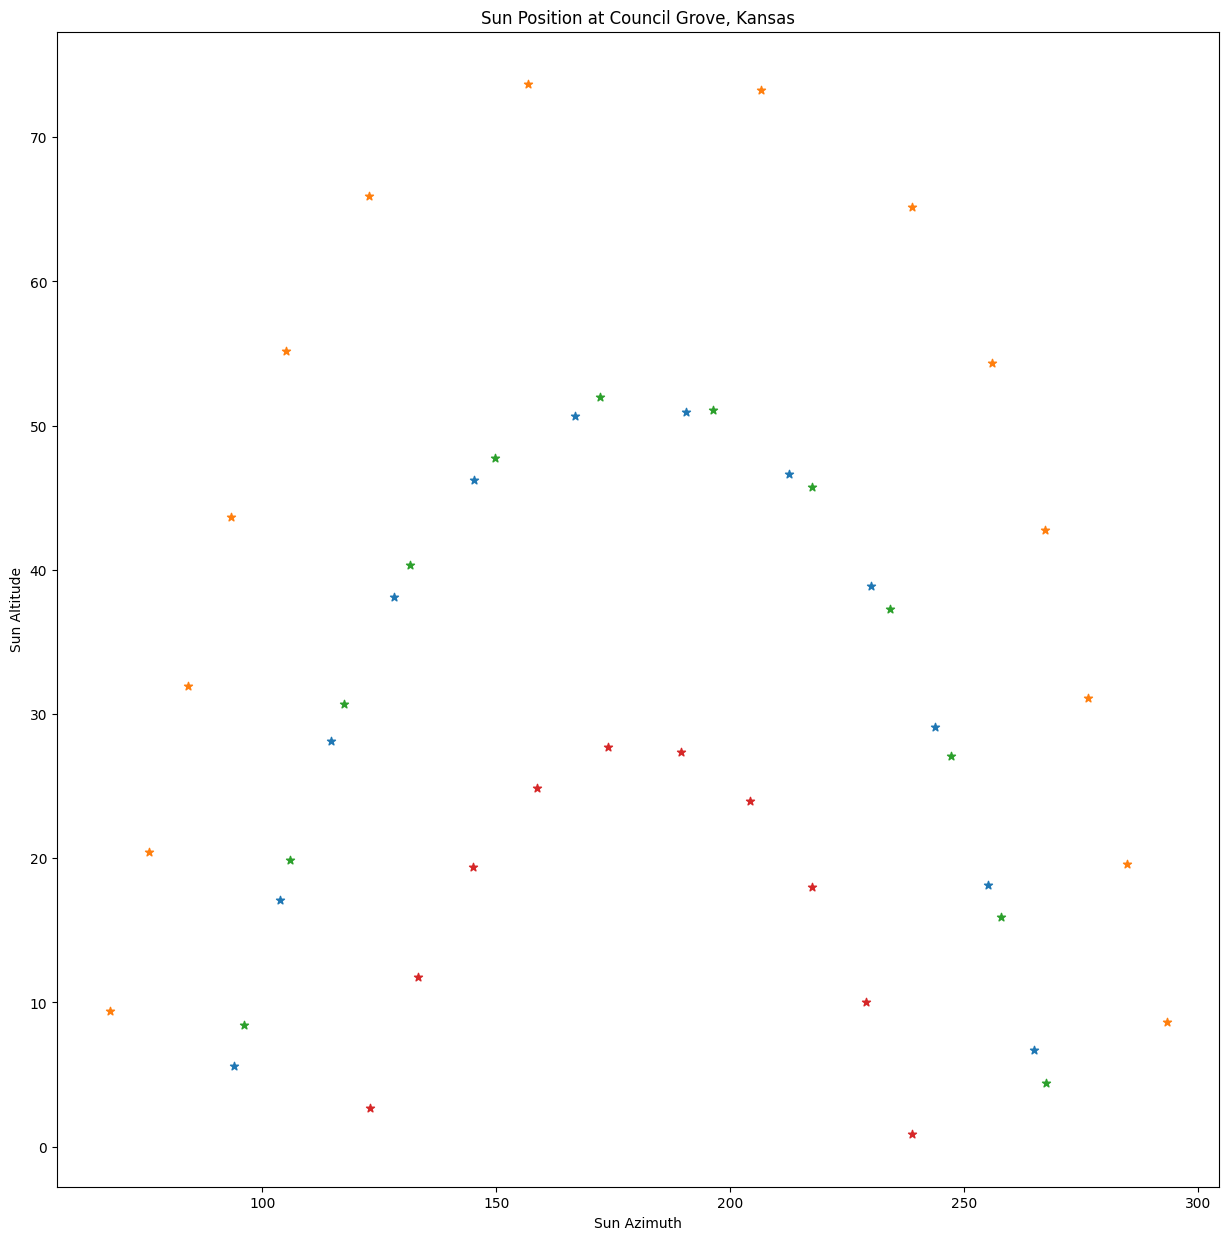

In [10]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(data['azimuth'],data['apparent_elevation'], marker="*")
plt.scatter(data2['azimuth'],data2['apparent_elevation'], marker="*")
plt.scatter(data3['azimuth'],data3['apparent_elevation'], marker="*")
plt.scatter(data4['azimuth'],data4['apparent_elevation'], marker="*")

plt.title("Sun Position at Council Grove, Kansas")
plt.xlabel("Sun Azimuth")
plt.ylabel("Sun Altitude");

**Challenge**

Plot the Sun's position at noon as viewed from one location over the course of one year.

In [12]:
# Definition of a time range of simulation
year = pd.date_range('2022-01-01 00:00:00', '2022-12-31 23:59:59', inclusive='left', freq='H', tz=site.tz)

In [13]:
# Estimate Solar Position with the 'Location' object
yeardata = site.get_solarposition(year)

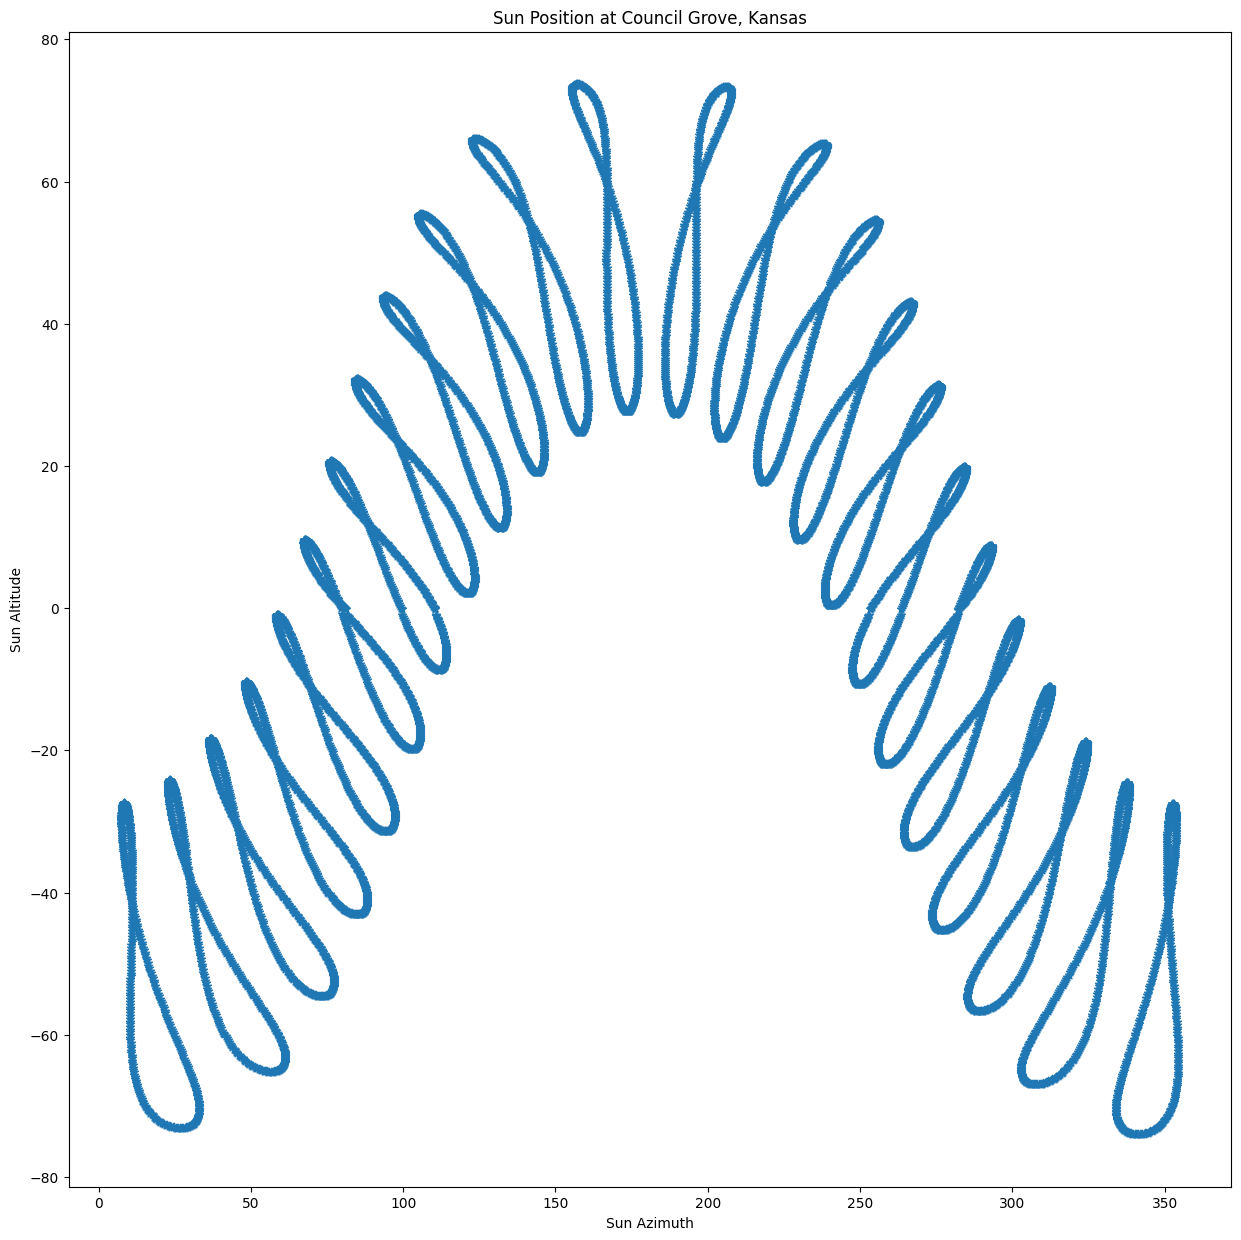

In [14]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(yeardata['azimuth'],yeardata['apparent_elevation'], marker="*")

plt.title("Sun Position at Council Grove, Kansas")
plt.xlabel("Sun Azimuth")
plt.ylabel("Sun Altitude");